# Trabajo Práctico 1 - Matrices de Insumo Producto
**Grupo:** Grupo Sin Nombre

**Integrantes:** Luna Praino, Gabriel Esquerdo y Jonathan Semelak

### Importante:

Para ejectutar las celdas de aquí en adelante, es imperativo contar con el archivo **funciones.py** en el directorio de esta notebook.

### Consigna 1

Probar que
$(\mathbf{I} − \mathbf{A})^{−1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + . . . + {A}^{n} + . . . ⇒ \lim_{n \to \infty} \mathbf{A}^{n+1} = 0 \space (5)$

la vuelta también vale, pero para la consigna dejamos una sola dirección.
Vamos a estudiar en la práctica la convergencia de esta suma infinita

### Resolución
La norma $(||\mathbf{A}|| < 1)$ es una condición necesaria para que la serie geométrica de matrices $\mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots$ converja y esta igualdad

$(\mathbf{I} - \mathbf{A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots$ sea válida. Esto se debe a que cuando $(||\mathbf{A}|| < 1)$, las potencias $(\mathbf{A}^{n})$ tienden a cero, permitiendo que la serie geométrica de matrices converja a una matriz finita.

Conociendo esto vamos a probar la implicación por contrarrecíproco

Si $ \mathbf{p} ⇒ \mathbf{q},\space entonces \space\neg \space\mathbf{q} ⇒ \neg \space\mathbf{p}$

Supongamos que el límite de $\mathbf{A}^{n+1}$ es distinto de cero cuando n tiende a infinito. Esto implica que las potencias de A, en lugar de decrecer, se mantienen constantes o incluso crecen.

Si $\lim_{n \to \infty} \mathbf{A}^{n+1} \neq 0$ entonces los términos de la serie geométrica: $\mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots$ no se vuelven más chicos según n aumenta. Para que una serie converja, los términos deben hacerse cada vez más chicos a medida que se suman mas términos.
En este caso los términos no pueden hacerse lo suficientemente pequeños, lo que implica que la serie geométrica diverge.

Y como la única forma de que valga $(\mathbf{I} − \mathbf{A})^{−1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots \space es \space que \space \mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots  converja,\space llegamos\space a\space que: $

$\lim_{n \to \infty} \mathbf{A}^{n+1} \neq 0\space ⇒ \space\mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \dots $ diverge.

Luego, queda probado que $(\mathbf{I} − \mathbf{A})^{−1} = \mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + . . . + {A}^{n} + . . . ⇒ \lim_{n \to \infty} \mathbf{A}^{n+1} = 0 $

### Consigna 2
Para las matrices $( \mathbf{A}_{1})\space y\space ( \mathbf{A}_{2})$, grafique dos vectores definidos de la forma:
$\mathbf{a}_{1}(n) = \| A_1^n \|_2 \quad \text{y} \quad \mathbf{a}_{2} = \| A_2^n \|_2.$
Cada uno de sus elementos representa la norma 2 de la matriz elevada a la potencia que corresponde a su índice. Para esta parte se puede utilizar scipy.linalg.norm. Los vectores los definimos de largo \( N = 250 \).

In [ ]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Librería para gráficos de calor
from scipy.linalg import norm

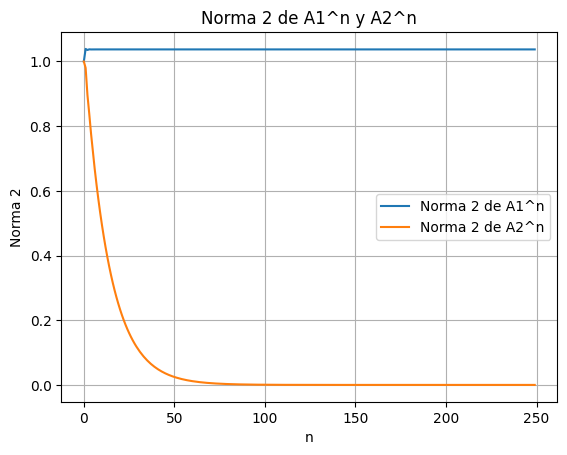

In [ ]:
# Definimos las matrices A1 y A2
A1 = np.array([[0.186, 0.521, 0.014, 0.32,  0.134],
               [0.24,  0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12,  0.311, 0.302, 0.208],
               [0.173, 0.03,  0.133, 0.14,  0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257],])

A2 = np.array([[0.186, 0.521, 0.014, 0.32,  0.134],
               [0.24,  0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12,  0.311, 0.302, 0.208],
               [0.173, 0.03,  0.133, 0.14,  0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257],])

N = 250
a1 = np.zeros(N)
a2 = np.zeros(N)

# Calcular las normas para cada potencia de las matrices
for n in range(N):
    a1[n] = np.linalg.norm(np.linalg.matrix_power(A1, n), ord=2)  # Norma 2 de A1^n
    a2[n] = np.linalg.norm(np.linalg.matrix_power(A2, n), ord=2)  # Norma 2 de A2^n

# Graficar los resultados
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de A1^n y A2^n')
plt.legend()
plt.grid()
plt.show()

### Consigna 3
Mediante el método de la potencia, encontramos el mayor autovalor de las matrices $A_1$ y $A_2$

In [ ]:
# Método de la potencia, normalizando en norma-2 en cada iteración
# n va a ser la longitud de mi vector aleatorio
def metodo_potencia(A, k, n):

    # Vector inicial aleatorio
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)  # Normalizamos el vector inicial

    for i in range(k):
        # Multiplicación matriz-vector
        v = np.dot(A, v)

        # Normalización para evitar que el vector crezca sin límite
        v = v / np.linalg.norm(v)

    # Calculamos el autovalor asociado con A v = lambda v
    Av = np.dot(A, v)
    lambda_max = np.dot(v, Av) / np.dot(v, v) # Promedio del cociente
    return lambda_max, v

In [ ]:
# Calculamos el mayor autovalor para las matrices A1 y A2
autovalor_A1, autovector_A1 = metodo_potencia(A1, 50, 5)
autovalor_A2, autovector_A2 = metodo_potencia(A2, 50, 5)

print("El mayor autovalor de A1 es:", autovalor_A1)
print("El autovector correspondiente de A1 es:", autovector_A1)
print("El mayor autovalor de A2 es:", autovalor_A2)
print("El autovector correspondiente de A2 es:", autovector_A2)

El mayor autovalor de A1 es: 1.0
El autovector correspondiente de A1 es: [0.47371132 0.43594458 0.42279417 0.2271679  0.59597798]
El mayor autovalor de A2 es: 0.9276514472123601
El autovector correspondiente de A2 es: [0.52728006 0.45581247 0.46176082 0.25669734 0.48486509]


Dado que el método de la potencia es inicializado con un vector aleatorio $x_0$, vamos a hacer el cálculo del autovalor estadísticamente con el método de Monte Carlo. Este procedimiento repite la operación un número importante de veces (digamos 250). Se pide en la consigna transcribir en una tabla el promedio de los autovalores de las 250 iteraciones de Monte Carlo para cada matriz, poniendo además el desvío estandar encontrado.

In [ ]:
# Decidimos limitar sus iteraciones ya que el desvío es más pronunciado.
# Simulación de Monte Carlo
num_monte_carlo = 250
autovalores_A1 = []
autovalores_A2 = []

# Ejecutamos el método de la potencia limitado para A1 y A2 en 250 iteraciones de Monte Carlo
for _ in range(num_monte_carlo):
    autovalor_A1, _ = metodo_potencia(A1, k=10, n = 5)  # Solo nos interesa el autovalor
    autovalores_A1.append(autovalor_A1)

    autovalor_A2, _ = metodo_potencia(A2, k=10, n = 5)  # Solo nos interesa el autovalor
    autovalores_A2.append(autovalor_A2)

# Convertimos las listas en arrays de NumPy para calcular estadísticas
autovalores_A1 = np.array(autovalores_A1)
autovalores_A2 = np.array(autovalores_A2)

# Calculamos el promedio y el desvío estándar de los autovalores
promedio_A1 = np.mean(autovalores_A1)
desvio_A1 = np.std(autovalores_A1)

promedio_A2 = np.mean(autovalores_A2)
desvio_A2 = np.std(autovalores_A2)

# Presentamos los resultados en una tabla
print("Resultados de la Simulación de Monte Carlo (250 iteraciones)")
print("----------------------------------------------------------")
print(f"| {'Matriz':<10} | {'Promedio Autovalor':<20} | {'Desvío Estándar':<20}  |")
print("----------------------------------------------------------")
print(f"| {'A1':<10} | {promedio_A1:<20} | {desvio_A1:<20} |")
print(f"| {'A2':<10} | {promedio_A2:<20} | {desvio_A2:<20} |")
print("----------------------------------------------------------")


Resultados de la Simulación de Monte Carlo (250 iteraciones)
----------------------------------------------------------
| Matriz     | Promedio Autovalor   | Desvío Estándar       |
----------------------------------------------------------
| A1         | 1.0000000561048705   | 7.476379335441311e-08 |
| A2         | 0.9276531577098226   | 5.002401470559422e-06 |
----------------------------------------------------------


### Consigna 4
$(a)$ De forma similar a la consigna 2, graficar la serie de potencias $({I} − A)^{−1}$ de $A_1$ y $A_2$ (siguiendo la ecuación 4) para $\space n = 10$ y $n = 100$.

In [ ]:
def serie_potencias(A, n):
  serie = np.eye(A.shape[0])

  # Calcular la serie de potencias de las matrices
  for i in range(1, n + 1):
      serie += np.linalg.matrix_power(A, i)
  return serie


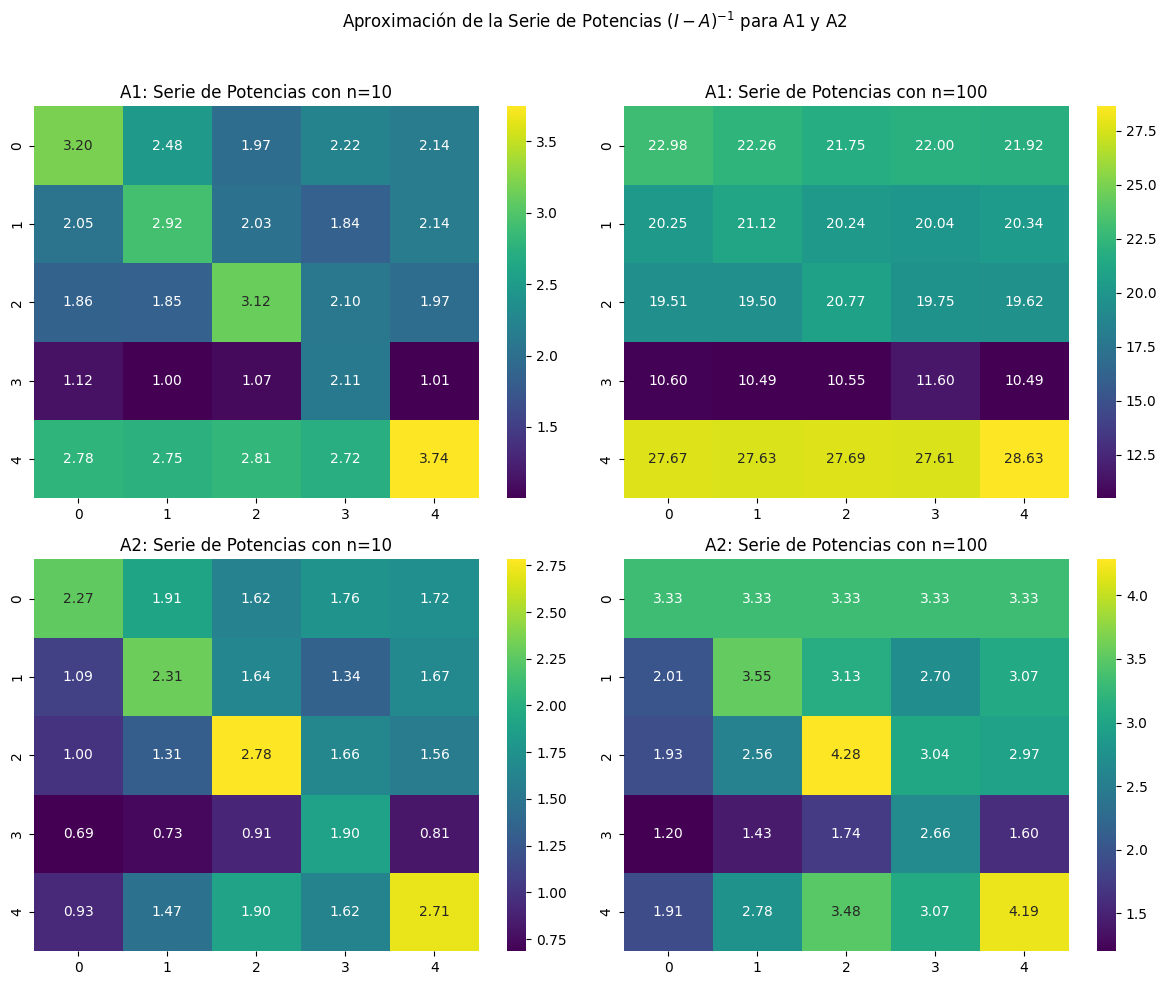

In [ ]:
# Configuración para gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Aproximación de la Serie de Potencias $(I - A)^{-1}$ para A1 y A2")

# Calcular y graficar para A1, n=10
serie_10_A1 = serie_potencias(A1, 10)
sns.heatmap(serie_10_A1, annot=True, fmt=".2f", cmap="viridis", ax=axes[0, 0])
axes[0, 0].set_title("A1: Serie de Potencias con n=10")

# Calcular y graficar para A1, n=100
serie_100_A1 = serie_potencias(A1, 100)
sns.heatmap(serie_100_A1, annot=True, fmt=".2f", cmap="viridis", ax=axes[0, 1])
axes[0, 1].set_title("A1: Serie de Potencias con n=100")

# Calcular y graficar para A2, n=10
serie_10_A2 = serie_potencias(A2, 10)
sns.heatmap(serie_10_A2, annot=True, fmt=".2f", cmap="viridis", ax=axes[1, 0])
axes[1, 0].set_title("A2: Serie de Potencias con n=10")

# Calcular y graficar para A2, n=100
serie_100_A2 = serie_potencias(A2, 100)
sns.heatmap(serie_100_A2, annot=True, fmt=".2f", cmap="viridis", ax=axes[1, 1])
axes[1, 1].set_title("A2: Serie de Potencias con n=100")

# Mostrar los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustamos para que el título general no se superponga
plt.show()

Cada celda en los gráficos de calor representa un elemento específico de la matriz acumulada.

El color de cada celda refleja el valor numérico de ese elemento en la matriz acumulada.

Vemos cómo en la matriz A1 de un gráfico al otro los valores de todas las celdas aumentan significativamente. Esto podría significar que la matriz todavía no convergió totalmente y el valor de esas celdas seguirá aumentado con cada término adicional.

Para corroborar esto vamos a ver los valores de las celdas con el doble de iteraciones de las que vimos.

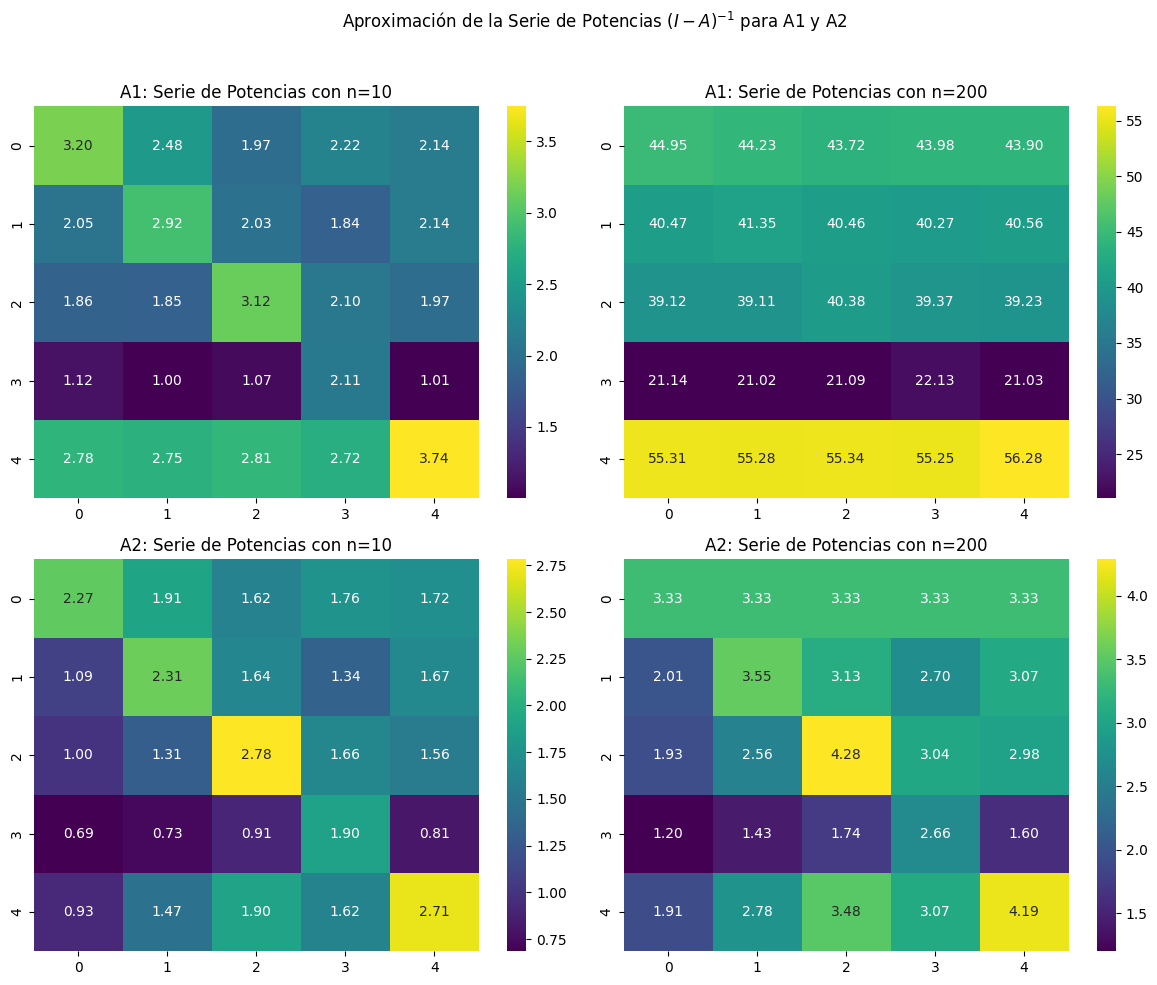

In [ ]:
# Configuración para gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Aproximación de la Serie de Potencias $(I - A)^{-1}$ para A1 y A2")

# Calcular y graficar para A1, n=10
serie_10_A1 = serie_potencias(A1, 10)
sns.heatmap(serie_10_A1, annot=True, fmt=".2f", cmap="viridis", ax=axes[0, 0])
axes[0, 0].set_title("A1: Serie de Potencias con n=10")

# Calcular y graficar para A1, n=200
serie_200_A1 = serie_potencias(A1, 200)
sns.heatmap(serie_200_A1, annot=True, fmt=".2f", cmap="viridis", ax=axes[0, 1])
axes[0, 1].set_title("A1: Serie de Potencias con n=200")

# Calcular y graficar para A2, n=10
serie_10_A2 = serie_potencias(A2, 10)
sns.heatmap(serie_10_A2, annot=True, fmt=".2f", cmap="viridis", ax=axes[1, 0])
axes[1, 0].set_title("A2: Serie de Potencias con n=10")

# Calcular y graficar para A2, n=200
serie_200_A2 = serie_potencias(A2, 200)
sns.heatmap(serie_200_A2, annot=True, fmt=".2f", cmap="viridis", ax=axes[1, 1])
axes[1, 1].set_title("A2: Serie de Potencias con n=200")

# Mostrar los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustamos para que el título general no se superponga
plt.show()


Efectivamente, vemos como la serie con la matriz A1 parece que diverge. Mientras que con la matriz A2 converge.

### Consigna $4)$ $(c)$
¿Podría establecer una regla por la cual se pueda asegurar la convergencia de la serie infinita?

Podría establecer una regla por la cual se pueda asegurar convergencia de la serie infinita, pero necesariamente sería relativa a algún otro parámetro.

Podría por ejemplo establecerse que la serie convergió para un dado $k$ cuando el término $k+1$ no es significativamente distinto del término $k$. Sin embargo el cuánto es significativo es algo que depende del contexto. A primer orden se podría tomar una cota ad hoc (como de hecho se hace más adelante en el trabajo práctico). Otra posibilidad podría ser tomar como cota alguna el error numérico asociado a la aritmética de punto flotante con la que se trabaje. En un caso aplicado, también podría tenerse en cuenta el error intrínseco a la determinación de los datos experimentales con los que se trabaje.

En este trabajo práctico, tomaremos como criterio de convergencia que la norma 2 de la diferencia entre el término $k$ y el $k+1$ sea menor a $1-\epsilon$, con $\epsilon$ entre 0 y 1 (tomaremos arbitrariamente $\epsilon = 1 - 10^{-10}$, pues sin saber el error tolerable en las estimaciones a realizar, esto es arbitrario).

### Consigna $4)$ $(d)$
En caso de existir convergencia, grafique el error obtenido como un vector $e(n) = ∥(I+ A + A^{2} + A^{3} + . . . + A^{n}) − (I − A)^{−1} ∥_{2}$.

Nota: calcular $(I − A)^{−1}$ con la función inversaLU desarrollada por el grupo en el TP1.

In [ ]:
import pandas as pd
import funciones

In [ ]:
# Lo hacemos para A2 que si converge
def error(A):
  matriz_identidad = np.eye(A.shape[0])
  descomposicion_LU = funciones.calcularLU(matriz_identidad-A)
  L, U, P = descomposicion_LU
  leontief = funciones.inversaLU(L, U, P)
  result = serie_potencias(A, 100) - leontief
  result = np.linalg.norm(result, ord=2)
  return result
print(error(A2))


0.007364769794787802


### Consigna 5


In [ ]:
#cargamos la planilla de cálculo como un dataframe de Pandas:
df = pd.read_excel('matrizlatina2011_compressed_0.xlsx', sheet_name='LAC_IOT_2011')

Queremos encontrar el autovalor mayor mediante el método de la potencia. En particular para $A^{ss}$ y $A^{rr}$

Primero obtenemos las submatrices de interés.

In [ ]:
Z_URYxURY=funciones.obtener_matriz_insumo_producto(df,'URY','URY')
Z_PANxPAN=funciones.obtener_matriz_insumo_producto(df,'PAN','PAN')

In [ ]:
# Calculamos el mayor autovalor para las matrices A1 y A2
vector_aleatorio = np.random.rand(40)

autovalor_Z_URYxURY, autovector_Z_URYxURY = metodo_potencia(Z_URYxURY, 50, 40)
autovalor_Z_PANxPAN, autovector_Z_PANxPAN = metodo_potencia(Z_PANxPAN, 50, 40)

print("El mayor autovalor de A1 es:", autovalor_Z_URYxURY)
print("El autovector correspondiente de A1 es:", autovector_Z_URYxURY)
print("El mayor autovalor de A2 es:", autovalor_Z_PANxPAN)
print("El autovector correspondiente de A2 es:", autovector_Z_PANxPAN)

# Con 50 iteriaciones
# El mayor autovalor de A1 es: 3460.827683984633
# El mayor autovalor de A2 es: 2364.5072700769033

# Con 100 iteraciones

El mayor autovalor de A1 es: 3460.8276839846017
El autovector correspondiente de A1 es: [6.59951964e-02 7.74090367e-04 0.00000000e+00 1.58715906e-02
 5.16529220e-02 3.65387465e-02 1.79565907e-03 3.30002368e-02
 4.29421196e-02 1.71868324e-02 6.39253920e-04 6.78763085e-03
 3.90197183e-04 1.87772990e-02 6.13854719e-02 5.12569304e-02
 2.69533452e-02 1.72277803e-02 3.80291434e-02 4.70378528e-02
 6.12425782e-02 1.20412731e-02 2.78277795e-03 3.60380509e-02
 2.49817057e-03 6.57427446e-04 1.20301277e-02 1.13970371e-04
 7.61307874e-05 6.20168137e-03 0.00000000e+00 2.87400776e-04
 4.66540501e-03 7.84850822e-02 4.90986825e-01 1.42649013e-01
 5.52815007e-02 2.13100641e-01 2.91199304e-01 7.55264932e-01]
El mayor autovalor de A2 es: 2364.5072700769033
El autovector correspondiente de A2 es: [3.64316367e-02 1.30993857e-02 0.00000000e+00 1.72540880e-02
 6.33226584e-02 1.43618265e-02 6.13753848e-03 1.53125966e-02
 9.84204032e-03 0.00000000e+00 0.00000000e+00 1.53041886e-03
 0.00000000e+00 3.41790281e-03

Segunda parte del ejercicio 5

In [ ]:
# miro la función serie de potencias para mirar la convergencia
def norma_2(matriz):
    """Calculamos la norma 2 de una matriz."""
    return np.linalg.norm(matriz, ord=2)

def existe_convergencia(matriz, max_iteraciones, epsilon=1 - 10**-10):
    """Calculamos la serie de potencias de una matriz hasta que converja según el criterio."""
    I = np.eye(matriz.shape[0])  # Matriz identidad
    A_k = I.copy()  # Comenzamos con I
    suma = I.copy()  # Empezamos la suma con la matriz identidad
    convergencia = False

    for k in range(max_iteraciones):
        A_k = matriz @ A_k  # Calculamos A^k (multiplicamos por A en cada iteración)
        suma += A_k  # Sumamos el nuevo término A^k a la suma

        # Calculamos la norma de la última potencia calculada
        if norma_2(A_k) < 1 - epsilon:
            convergencia = True
            break

    return suma, convergencia

# Aplicar la función serie_potencias a las matrices Z_URYxURY y Z_PANxPAN
primera_matriz, convergencia_primera = existe_convergencia(Z_URYxURY, 90)
segunda_matriz, convergencia_segunda = existe_convergencia(Z_PANxPAN, 90)

print(f"Matriz A^ss: {primera_matriz}, Convergencia: {convergencia_primera}")
print(f"Matriz A^rr: {segunda_matriz}, Convergencia: {convergencia_segunda}")

Matriz A^ss: [[1.27879656e+146 1.42364725e+146 1.33856567e+146 ... 1.32450494e+146
  1.24249921e+146 1.15877716e+146]
 [1.24091680e+146 1.38147682e+146 1.29891547e+146 ... 1.28527124e+146
  1.20569464e+146 1.12445255e+146]
 [1.22608708e+146 1.36496731e+146 1.28339263e+146 ... 1.26991145e+146
  1.19128584e+146 1.11101464e+146]
 ...
 [1.06080784e+146 1.18096672e+146 1.11038848e+146 ... 1.09872459e+146
  1.03069789e+146 9.61247424e+145]
 [1.15857672e+146 1.28980998e+146 1.21272693e+146 ... 1.19998805e+146
  1.12569169e+146 1.04984036e+146]
 [1.22095687e+146 1.35925600e+146 1.27802264e+146 ... 1.26459787e+146
  1.18630125e+146 1.10636592e+146]], Convergencia: False
Matriz A^rr: [[7.48369674e+145 9.56543591e+145 8.73259566e+145 ... 8.45008079e+145
  9.09833099e+145 8.01609680e+145]
 [7.07269204e+145 9.04010207e+145 8.25300142e+145 ... 7.98600226e+145
  8.59865056e+145 7.57585268e+145]
 [7.62504930e+145 9.74610849e+145 8.89753750e+145 ... 8.60968647e+145
  9.27018087e+145 8.16750536e+145]
 .

# Consigna 6


#**a**)

Para mayor claridad, abordaremos esta consigna en dos partes.


### **Parte 1**

En primer lugar, demostramos que para cualquier vector $z ∈ \mathbb{R}^n$, el promedio de las componentes del vector $E_nz$ es 0:

$E_nz$ está expresado de esta forma:

$E_nz = (I_n - \frac{1}{n} ee^t)z$

Donde $E_nz$ es un vector de $\mathbb{R}^n$ pues $I_n ∈ \mathbb{R}^{n \times n}$ y $z ∈ \mathbb{R}^n$. Por definición, el promedio de las componentes $(E_nz)_i$ se calcula como:

$
\frac{1}{n}
\sum_{i=1}^{n} (E_nz)_i
 = \frac{1}{n} \sum_{i = 1}^{n} ((I_nz)_i - \frac{1}{n} (ee^tz)_i)
$

Ahora, analizamos cada término en particular. En primer lugar:

$I_nz = z$

Pues cualquier matriz/vector multiplicada/o por la identidad es igual sí misma/o. Por otro lado:

$ee^tz = \begin{pmatrix}
\sum_{j=1}^n z_j \\
\sum_{j=1}^n z_j \\
\vdots \\
\sum_{j=1}^n z_j
\end{pmatrix}$

Es decir, en cada componente de $ee^tz$ se tiene la suma de todos los elementos de z. Con esta información, podemos analizar cómo se comporta cada componente de $\frac{1}{n}
\sum_{i=1}^{n}E_nz$:

$\frac{1}{n}
\sum_{i=1}^{n}(E_nz)_i = \frac{1}{n} \sum_{i = 1}^{n} z_i - \frac{1}{n^2} \sum_{i = 1}^{n} \sum_{j = 1}^{n} z_j$

Pero, en el segundo término del miembro derecho de la igualdad estamos, estamos sumando $n$ veces $\sum_{i = 1}^{n} z_i$. Con esto obtenemos entonces:

$\frac{1}{n}
\sum_{i=1}^{n}(E_nz)_i = \frac{1}{n} \sum_{i = 1} z_i - \frac{1}{n^2}n \sum_{i = 1}^{n} z_i = 0$

Donde se ve que los términos del miembro derecho se cancelan. Esto demuestra que:

$\frac{1}{n}
\sum_{i=1}^{n}(E_nz)_i = 0$

### **Parte 2**

Se pide analizar el efecto de la matriz $E_n$ sobre una matriz $A$ de $n\times n$. Para ello, primero volveremos a analizar el efecto de multiplicar a un vector $z \in \mathbb{R}^n$ por la matriz $E_n$:

$
E_n z = (I_n - \frac{1}{n} ee^t)z = z - \frac{1}{n}\sum_{i}^{n}z_{i}
$

$
E_n z = z - \langle z_{i} \rangle
$

Es decir, multiplicar a un vector $z$ por la matriz $E_{n}$ le sustrae el promedio de sus componentes, notado aquí como $\langle z_{i} \rangle$ (notar que esto es un vector de $\mathbb{R}^n$). Alternativamente, se puede pensar que $E_{n}$ proyecta al vector al subespacio de vectores con suma de componentes nula (veremos eso más adelante).

Habiendo entendido cómo opera $E_{n}$ sobre un vector de $\mathbb{R}^n$, podemos analizar cómo opera sobre matrices de $\mathbb{R}^{n \times n}$. Específicamente, analizaremos qué le ocurre a una matriz $A \in R^{n \times n}$ cuando se multplica a izquierda por $E_{n}$.

De acuerdo a la multiplicación de matrices en bloque, se tiene que el producto $E_{n} A$ puede escribirse como:

$
E_{n} A = \begin{pmatrix}
| & | & & | \\
E_{n} \, w_{1} & E_{n} \, w_{2} & \cdots & E_{n} \, w_{n} \\
| & | & & |
\end{pmatrix} \quad w_{i} = \text{Col}_{i}(A)$

De modo que se obtiene:

$
E_{n} A = \begin{pmatrix}
| & | & & | \\
w_{1} - \langle w_{1} \rangle & w_{2} - \langle w_{2} \rangle& \cdots & w_{n} - \langle w_{n} \rangle \\
| & | & & |
\end{pmatrix} $

Donde $\langle w_{i} \rangle$ es el vector promedio de las componentes del $i$-ésimo vector columna de la matriz $A$. Por lo tanto, el efecto de multiplicar por izquierda $E_n$ da lugar a una matriz en la que las columnas son las columnas de la matriz original, pero con su promedio eliminado.

Análogamente, puede analizarse que $AE_{n}$ da lugar a una matriz con las mismas filas que $A$, pero con su promedio (por fila) eliminado.

## **b)**

### **Parte 1**: Autovalores y autovectores de $E_{n}$
En primer lugar buscaremos los autovalores y autovectores de $E_{n}$. Por definición, tenemos que un vector $x \in \mathbb{R}^{n}$ y un escalar $\lambda \in \mathbb{R}$ son autovector y autovalor, respectivamente, de $A$ si es verifica:

$(I_n - \frac{1}{n}ee^t)x = \lambda x$


Distribuimos $x$ y reordenando, se tiene:

$I_nx - \frac{1}{n}ee^{t}x = \lambda x$

$x - \frac{1}{n}ee^{t}x = \lambda x$

$x - \lambda x = \frac{1}{n}ee^{t}x$

$(1 - \lambda)x = \frac{1}{n}ee^{t}x$

Ahora utilizamos la **sugerencia** dada por el enunciado: Existe una base de vectores $\{e, d_{2}, \cdots , d_{n} \}$ de $\mathbb{R}^{n}$ siendo $\{ d_{2}, \cdots , d_{n} \}$ una base de $\langle e \rangle^{\perp}$.

Consideramos dos casos:

- Si $x$ es igual a $e$, de la ecuación de autovalores se obtiene:

$(1 - \lambda)e = \frac{1}{n}ee^{t}e = \frac{1}{n}e \, n = e \iff \lambda = 0$

Es decir, que $e$ es autovector de $E_{n}$ con autovalor 0. En lo anterior, utilizamos que $e^{t}e = \sum_{i=1}^{n} 1 = n$.

- Si $x \in \langle e \rangle^{\perp}$, se tiene  entonces  $e^{t} x = 0$ y por lo tanto queda:

$(1 - \lambda)x = \frac{1}{n}ee^{t}x = 0 \iff \lambda = 1$ (pues $x\ne 0 \in \mathbb{R}^{n}$)

Pero, sabemos que existe una base  $\{e, d_{2}, \cdots , d_{n} \}$ con las propiedades antes mencionadas. Por lo tanto, $E_{n}$ tiene una base de autovectores $\{e, d_{2}, \cdots , d_{n} \}$ donde $e$ tiene autovalor $0$ y los $d_{i}$ tienen autovalor $1$.

### **Parte 2**: Núcleo e imágen de $E_{n}$

Por definición, un vector $z \in \mathbb{R}^n$ no nulo pertence al núcleo de $E_{n}$ si verifica:

$
E_{n} z = 0
$

Desarrollando con la expresión de $E_{n}$:

$(I_n - \frac{1}{n}ee^t)z = 0$

$z - \frac{1}{n}ee^t{z} = 0$

Pero, ya vimos que esto vale si el vector es igual $e$. Más aún, vale para cualquier vector proporcional a $e$, y por lo tanto el núcleo tiene dimensión 1 y es el subespacio generado por $e$:

$
Nu(E_{n})=\langle e \rangle
$

La imagen son los vectores que pueden escribirse como $E_{n}z$ para algún $z \in \mathbb R^{n}$. Es decir, todos aquellos que son de la forma:

$(I_n - \frac{1}{n}ee^t)z = z -  \frac{1}{n}ee^t z $

Pero, el segundo término del miembro derecho no es otra cosa que la proyección ortogonal de $z$ sobre el subespacio generado por $e$, pues:

$
P_{e}(z) = \frac{e e^{t} z}{e^{t}e} =   \frac{1}{n}e e^t z
$


Entonces la imagen de $E_{n}$ es son todos los vectores ortogonales a $e$:

$
Im(E_{n}) = \langle e \rangle ^{\perp}
$

Este subespacio se define por la condición $ e^{t}z = 0 $, o bien, por la ecuación $Im(E_{n})=\{ z \in \mathbb{R}^{n} : \sum_{i=1}^{n} z_{i} = 0 \}$.

## **c)**

Se pide ahora probar que $E_{n}$ es una proyección ortogonal. Para ello mostraremos que es simétrica e idempotente.

- $E_{n}$ es simétrica:

Por definición, $E_{n}$ es de la forma:

$E_{n} = I_{n}- \frac{1}{n}ee^{t}$

Desarrollando a partir de la definición del vetor $e$, se obtiene:

$E_{n} =
\begin{pmatrix}
1 & 0 & \dots & 0 \\
0 & 1 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
 0 & 0 & \dots & 1
\end{pmatrix}
-
\frac{1}{n}
\begin{pmatrix}
1 & 1 & \dots & 1 \\
1 & 1 & \dots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
 1 & 1 & \dots & 1
\end{pmatrix}
=
\begin{pmatrix}
1 - \frac{1}{n} & -\frac{1}{n} & \dots & -\frac{1}{n} \\
-\frac{1}{n} & 1 & \dots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
 -\frac{1}{n} & -\frac{1}{n} & \dots & 1 -\frac{1}{n}
\end{pmatrix}
$

Donde puede verse que es simétrica. Asimismo, podríamos demostrarlo más formalmente aplicando las propiedades de la transposición de matrices:

$
E_{n}^{t} = (I_{n}- \frac{1}{n}ee^{t})^{t} = I_{n}^{t}- \frac{1}{n}(ee^{t})^{t}= I_{n}- \frac{1}{n}(e^{t})^{t}e^{t} = I_{n}- \frac{1}{n}ee^{t} = E_{n}
$

- $E_{n}$ es itempotente:

De forma similar a lo anterior:

$
E_{n}^{2} = E_{n} E_{n} = (I_{n}- \frac{1}{n}ee^{t}) (I_{n}- \frac{1}{n}ee^{t}) = I_{n}-\frac{1}{n}ee^{t}-\frac{1}{n}ee^{t}+\frac{1}{n}e(\frac{1}{n}e^{t}e)e^{t}
$

$
E_{n}^{2} =I_{n}-\frac{1}{n}ee^{t}-\frac{1}{n}ee^{t}+\frac{1}{n}ee^{t}
$

$
E_{n}^{2} = I_{n}- \frac{1}{n}ee^{t} = E_{n}
$

Donde utilizamos que $\frac{1}{n}e^{t}e = 1$, pues hemos visto que $e^{t}e=n$.

Con esto queda demostrado que $E_{n}$ es una proyección ortogonal. Respecto a sobre qué subespacio proyecta $E_{n}$, como discutimos anteriormente, no es otra cosa que el generado por los vectores ortogonales a $e$, o bien, los vectores cuyas componentes suman 0.

### d)


- i) "$E_{n}$ es una matriz ortogonal."

**Esta afirmación es Falsa.**

Una matriz es ortogonal si su traspuesta es igual a su inversa. O, lo que es equivalente, que el producto entre ella y su traspuesta es la identidad.

En el caso de $E_{n}$, utilizando las propiedades antes demostradas se tiene que:

$E_{n}^{t} E_{n} = E_{n} E_{n} = E_{n} \ne I_{n}$

Y por lo tanto $E_{n}$ no es una matriz ortogonal.

- ii) "$E_{n}$ es singular."

**Esta afirmación es Verdadera.**

Una forma de ver esto es notar que existe un vector no nulo en el núcleo de $E_{n}$ (cualquier vector proporcional a $e$), como ya demostramos en items anteriores. También podría verse notando que $E_{n}$ tiene al menos un autovalor nulo, y por lo tanto su determinante es nulo.

- iii) "$E_{n}$ es definida positiva"

**Esta afirmación es falsa.**

Un contraejemplo con $n=3$ (por simplicidad):

$E_3$ = $\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} - \frac{1}{3} \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1  
\end{pmatrix} =
\begin{pmatrix}
\frac{2}{3} & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3} & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}
\end{pmatrix} $

Esta matriz es definida positiva si $\forall x \neq 0$, $x^tE_nx > 0$ pues ya sé que los elementos de la diagonal son positivos. Sin embargo, ya vimos que tomando $x=e = \begin{pmatrix} 1 & 1 & 1 \end{pmatrix}^{t}$:

$
x^tE_nx =
\begin{pmatrix} 1 & 1 & 1 \end{pmatrix} \begin{pmatrix}\frac{2}{3} & -\frac{1}{3} & -\frac{1}{3} \\
-\frac{1}{3} & \frac{2}{3} & -\frac{1}{3} \\
-\frac{1}{3} & -\frac{1}{3} & \frac{2}{3}
\end{pmatrix} \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \end{pmatrix}
$

Por lo tanto, $E_n$ no es definida positiva.


- iv) "$\text{traza}(E_{n}) = n - 1$."

**Esta afirmación es verdadera.**

La traza es la suma de todos los elementos de la diagonal de la matriz. En este caso, por la definición de $E_{n}$ se tiene que todos los elementos de la diagonal son $1 - \frac{1}{n}$, y $E_{n}$ tiene dimensión $n\times n$, tenemos $n$ componentes diagonales, entonces la traza se expresa de la siguiente forma:

$\text{traza}(E_n) = n (1 - \frac{1}{n})$

Y si distribuimos obtenemos que:

$\text{traza}(E_n) = n - 1 $

Como se quería demostrar.



# Consigna 7





Comenzamos definiendo una función que será útil para este ejercicio:

In [ ]:
import numpy as np

def En(n):
    """
    Input: Un entero n
    Output: La matriz En
    """
    In=np.eye(n)
    eet=np.ones((n,n))
    return In - (eet/n)

Cargamos la planilla de coeficientes técnicos en un dataframe de pandas:

In [ ]:
import pandas as pd
import funciones
df = pd.read_excel('matrizlatina2011_compressed_0.xlsx', sheet_name='LAC_IOT_2011')

In [ ]:
Arr =funciones.obtener_matriz_insumo_producto(df,'URY','URY')

In [ ]:
E40=En(40)

Arr_norm=E40 @ Arr

C=np.transpose(Arr_norm) @ Arr_norm /(40-1)

Implementamos el método de Hotelling:

In [ ]:
def hotelling(C, e):
    """
    Input: una matriz cuadrada C y un float e
    Output: su primer autovector (con máximo autovalor) y número de iteraciones (con el método de Hotelling)
    """
    avec = np.random.rand(len(C))  # x0
    avec /= np.linalg.norm(avec)  # Normaliza el vector para que tenga norma 1
    iteraciones = 0  # Contador de iteraciones
    convergido = False

    while not convergido and iteraciones < 1000:
        avec_new = C @ avec
        avec_new = avec_new/np.linalg.norm(avec_new)  # Normalización del vector

        convergido = (np.linalg.norm(avec_new - avec) <= (1-e))
        avec = avec_new
        iteraciones += 1

    # Calcular el autovalor asociado
    autovalor = (avec.T @ C @ avec) / (avec.T @ avec)

    return avec, autovalor

In [ ]:
# Calculamos el primer autovector y autovalor:
e= 1 - 1e-10
v1, lambda1 = hotelling(C, e)
v1 = v1 / np.linalg.norm(v1)  # Normaliza v1 para poder usarlo en Hotelling

Cprima = C - lambda1 * np.outer(v1, v1)
v2, lambda2 = hotelling(Cprima, e)

In [ ]:
#Comparamos con solución exacta
autovalores_np, autovectores_np = np.linalg.eig(C)

print(lambda1,lambda2)
print(autovalores_np[:2])

313684.9930049542 112234.3835288238
[313684.99300495+0.j 112234.38352882+0.j]


# Consigna 8


Aquí utilizamos los autovectores que determinamos anteriormente, y ploteamos la proyección de la matriz interregional de Uruguay en este espacio.

Nota: Se intentó utilizar el otro país asignado, Panamá, pero no se observó una mejora en términos de clusterización.

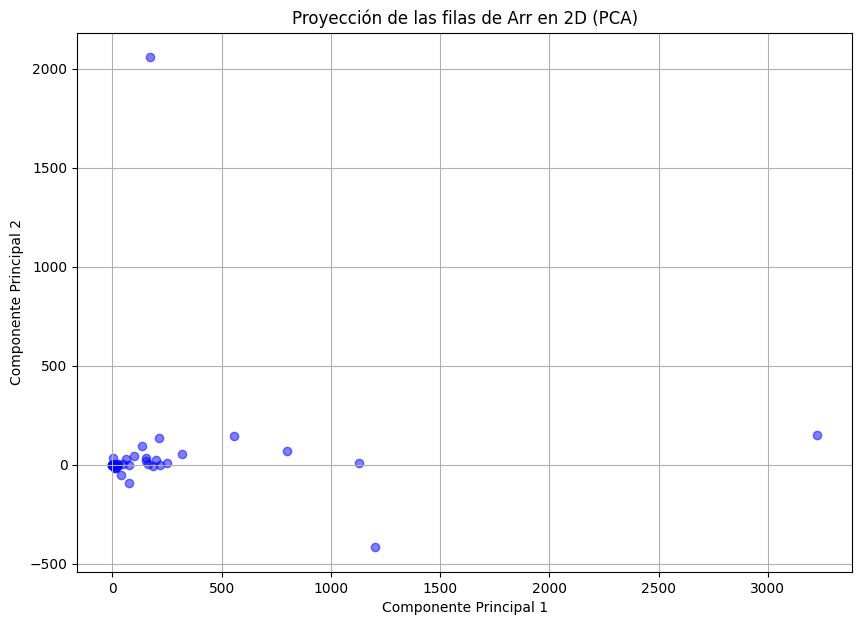

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tomamos los dos primeros autovectores normalizados
v1 = v1 / np.linalg.norm(v1)
v2 = v2 / np.linalg.norm(v2)
autovectores_principales = np.column_stack((v1, v2))

# Proyectar las filas de 'Arr' sobre los dos primeros autovectores
proyeccion_2D = Arr @ autovectores_principales

# Graficar el scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(proyeccion_2D[:, 0], proyeccion_2D[:, 1], c='blue', alpha=0.5)
plt.title('Proyección de las filas de Arr en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Consigna 9

La matriz $\mathbf{H}$ está definida como:

$
\mathbf{H}=\mathbf{A}(\mathbf{I} - \mathbf{A})^{-1}
$

Pero, anteriormente vimos que la matriz de leontief, si $||\mathbf{A}|| < 1$, la serie geométrica de matrices $\mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \cdots$ converge a $(\mathbf{I} - \mathbf{A})^{-1}$.

Bajo el supuesto de convergencia, tenemos:

$
\mathbf{H}=\mathbf{A}(\mathbf{I} - \mathbf{A})^{-1} = \mathbf{A} (\mathbf{I} + \mathbf{A} + \mathbf{A}^{2} + \mathbf{A}^{3} + \cdots)
$

$
\mathbf{H}=\mathbf{A}+\mathbf{A}^{2}+\mathbf{A}^{3}+\cdots
$

Es decir, que la relación entre $\mathbf{H}$ y la suma de potencias (de $\mathbf{A}$) está dada por:


$
\mathbf{H}=\sum_{k=1}^{\infty}A^{k}
$

# Consigna 10


In [ ]:
#La matriz Arr ya la tenemos. Calculamos la matriz de Leontief como:

matriz_identidad = np.eye(Arr.shape[0])
descomposicion_LU = funciones.calcularLU(matriz_identidad-Arr)
L, U, P = descomposicion_LU
leontief = funciones.inversaLU(L, U, P)

#Luego, la matriz H es (la notamos Hrr por consistencia):

Hrr = Arr @ leontief

#Ahora repetimos el análisis de componentes principales

E40=En(40)
Hrr_norm=E40 @ Hrr
C=np.transpose(Hrr_norm) @ Hrr_norm /(40-1)

# Calculamos el primer autovector y autovalor:
e= 1 - 1e-10
v1, lambda1 = hotelling(C, e)
v1 = v1 / np.linalg.norm(v1)  # Normaliza v1 para poder usarlo en Hotelling

Cprima = C - lambda1 * np.outer(v1, v1)
v2, lambda2 = hotelling(Cprima, e)

In [ ]:
#Comparamos con solución exacta
autovalores_np, autovectores_np = np.linalg.eig(C)

print(lambda1,lambda2)
print(autovalores_np[:2])

1627.499399516819 1.175311599628506
[1.6274994e+03+0.j 1.1753116e+00+0.j]


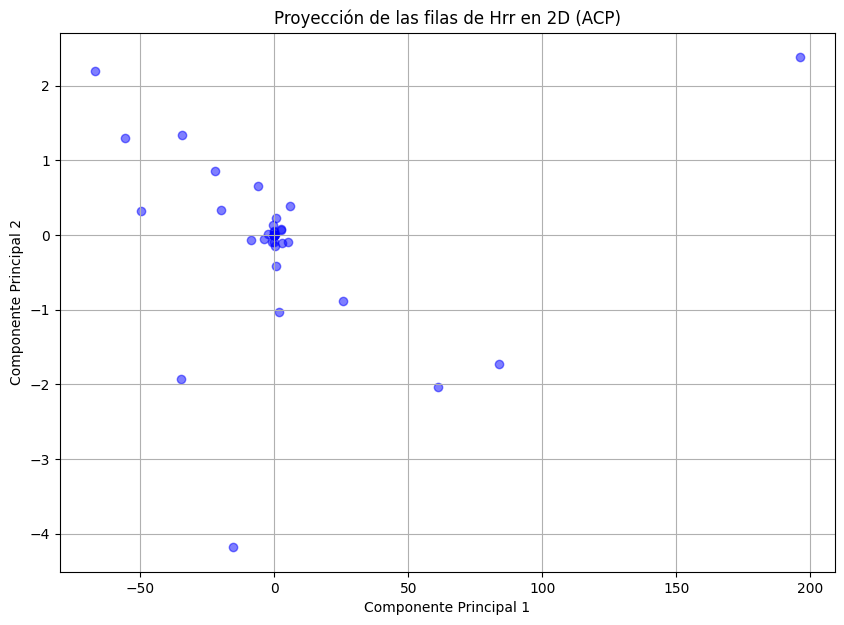

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tomamos los dos primeros autovectores normalizados
v1 = v1 / np.linalg.norm(v1)
v2 = v2 / np.linalg.norm(v2)
autovectores_principales = np.column_stack((v1, v2))

# Proyectar las filas de 'Arr' sobre los dos primeros autovectores
proyeccion_2D = Hrr @ autovectores_principales

# Graficar el scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(proyeccion_2D[:, 0], proyeccion_2D[:, 1], c='blue', alpha=0.5)
plt.title('Proyección de las filas de Hrr en 2D (ACP)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.grid(True)

# Mostrar el gráfico
plt.show()

# Consigna 11




In [ ]:
def visualizar_vector(vec, titulo, xlabel,ylabel):
    """
    Recibe:
        vec (shape (n,)): vector

    Devuelve:
        Nada. Solo muestra en pantalla un gráfico de barras.
    """
    plt.figure(figsize=(20, 5))
    sectores = [f's{i}' for i in range(1, len(vec)+1)] #Genera labels para cada sector
    ax = sns.barplot(x=sectores, y=vec)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo, fontsize=12)
    plt.show()

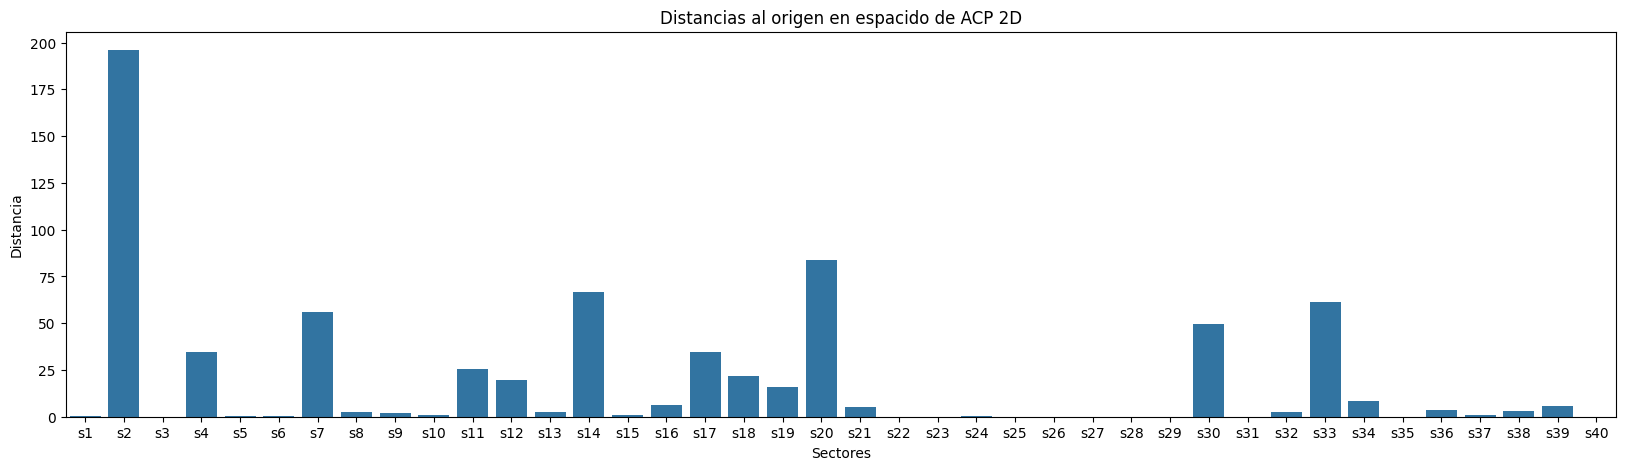

In [ ]:
# En el espacio de ACP 2D, calculamos la distancia al origen de cada punto

distancias = [np.linalg.norm(punto) for punto in proyeccion_2D]

visualizar_vector(distancias, 'Distancias al origen en espacido de ACP 2D', 'Sectores', 'Distancia')


Puede verse que el sector más lejano al origen es el s2. Sin embargo el más cercano es difícil de determinar visualmente.

Para ello buscaremos el mínimo y máximo utilizando numpy:

In [ ]:
smin=np.argmin(distancias)
smax=np.argmax(distancias)

print(f'Sector más cercano al origen: s{smin+1}') #Notación:los sectores se cuentan desde 1
print(f'Sector más lejano al origen: s{smax+1}') #Notación:los sectores se cuentan desde 1

Sector más cercano al origen: s3
Sector más lejano al origen: s2


Ahora graficamos la producción (fila) de $\mathbf{A}^{\text{rr}}$ y $\mathbf{H}$ en los sectores 2 y 3.

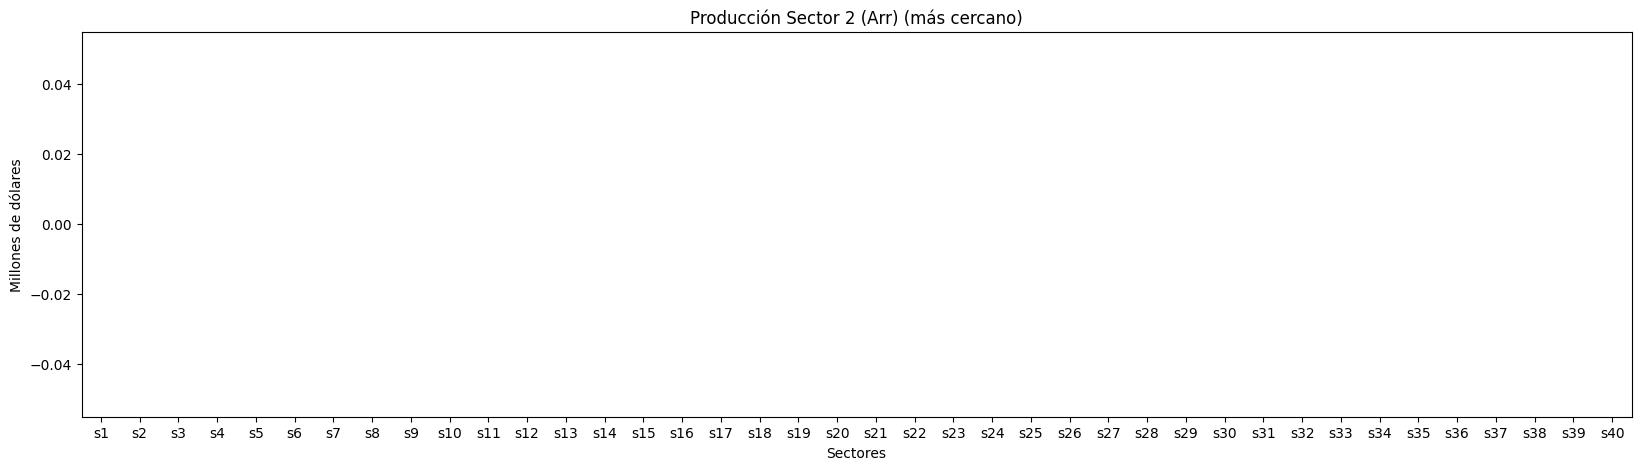

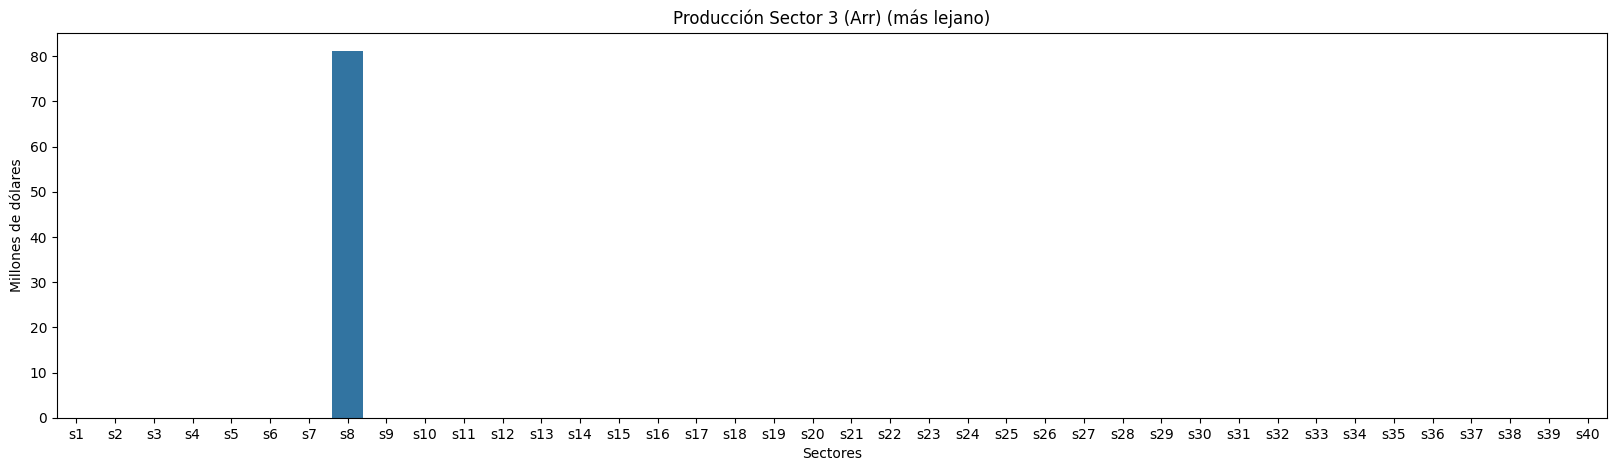

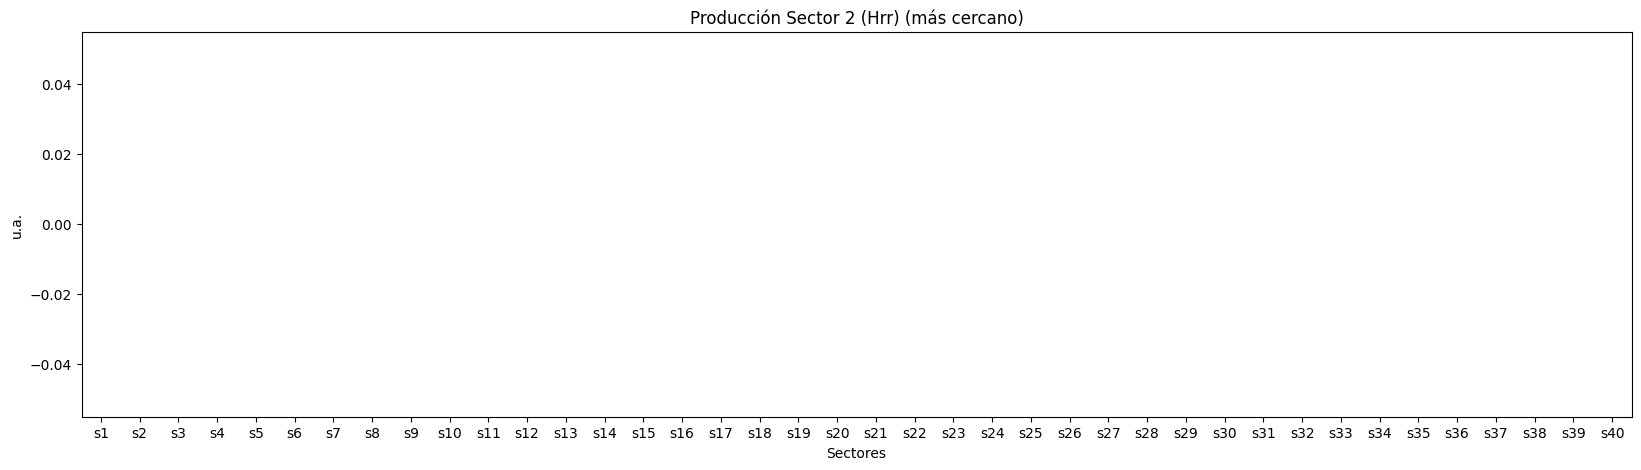

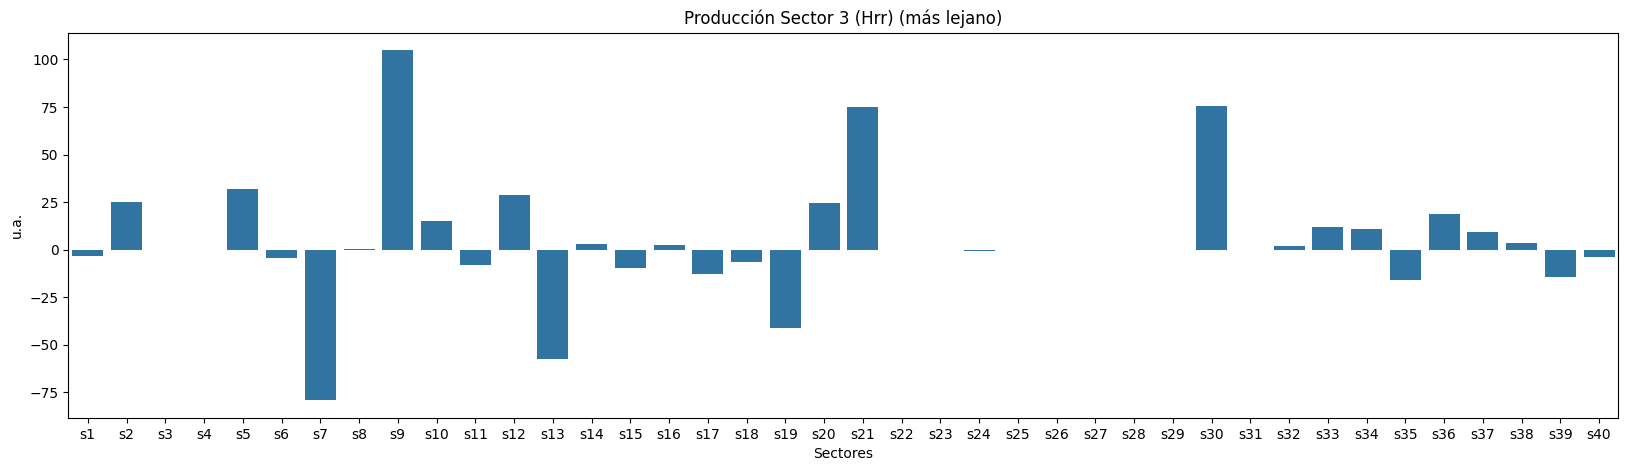

In [ ]:
fila_smin_de_Arr=Arr[smin]
fila_smax_de_Arr=Arr[smax]
fila_smin_de_Hrr=Hrr[smin]
fila_smax_de_Hrr=Hrr[smax]

visualizar_vector(fila_smin_de_Arr, 'Producción Sector 2 (Arr) (más cercano)', 'Sectores', 'Millones de dólares')
visualizar_vector(fila_smax_de_Arr, 'Producción Sector 3 (Arr) (más lejano)' , 'Sectores', 'Millones de dólares')
visualizar_vector(fila_smin_de_Hrr, 'Producción Sector 2 (Hrr) (más cercano)', 'Sectores', 'u.a.')
visualizar_vector(fila_smax_de_Hrr, 'Producción Sector 3 (Hrr) (más lejano)', 'Sectores', 'u.a.')

Puede verse que en a producción del sector 3 es bien distinta que la del sector 2.
Los sectores más influyentes o con un papel central en la economía tenderán a estar más lejos del origen, asimismo la matriz $\mathbf{H}$, que refuerza las conexiones, podría mostrar una mayor variabilidad en los sectores más lejanos, mientras que los cercanos pueden tener interacciones más débiles o menos diversificadas.